<a href="https://colab.research.google.com/github/MuhammadQaiser1921/ML_ALGORITHMS/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree** **Classification**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [3]:
dataset = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [4]:
dataset.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [5]:
dataset.drop(columns=['User ID','Gender'], inplace=True)

In [6]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

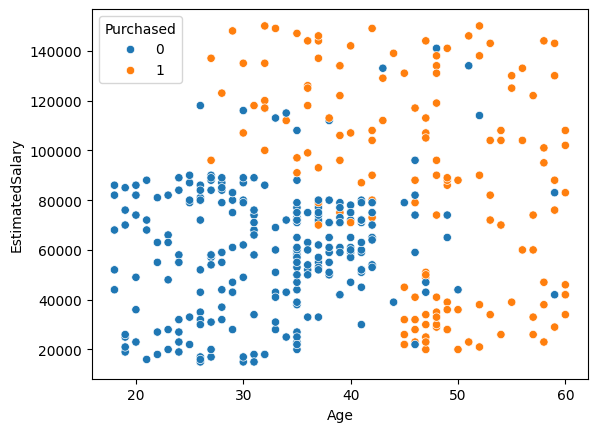

In [7]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset)

In [8]:
x = dataset.iloc[:,:-1].values
y = dataset['Purchased']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns = ['Age','EstimatedSalary'])

In [13]:
x.head(2)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
dt.score(x_train,y_train)*100

99.6875

In [20]:
dt.predict([[19, 19000]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
from sklearn.metrics import f1_score
f1_score(y, dt.predict(x), average=None)

array([0.97286822, 0.95070423])

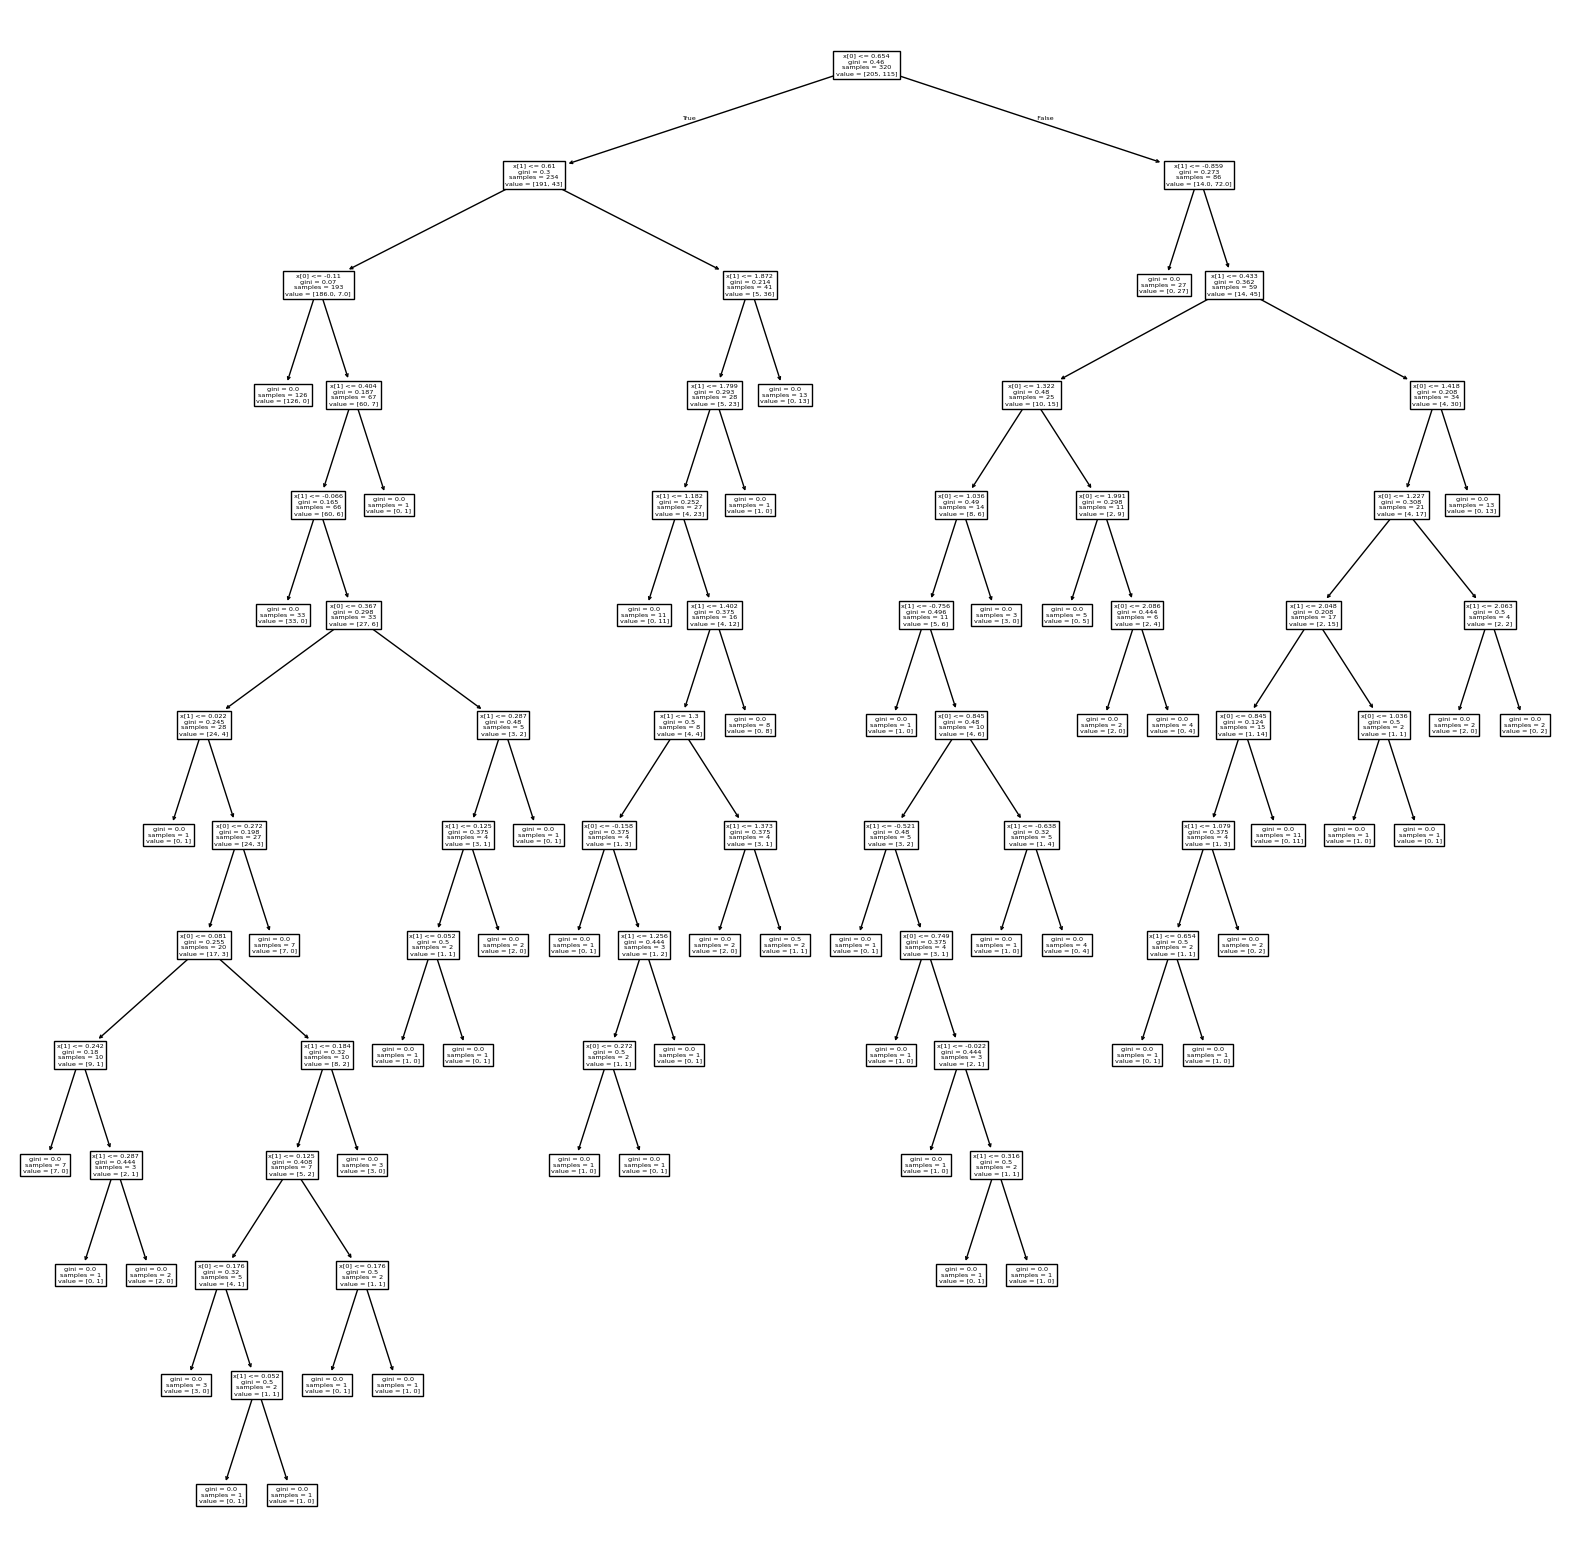

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


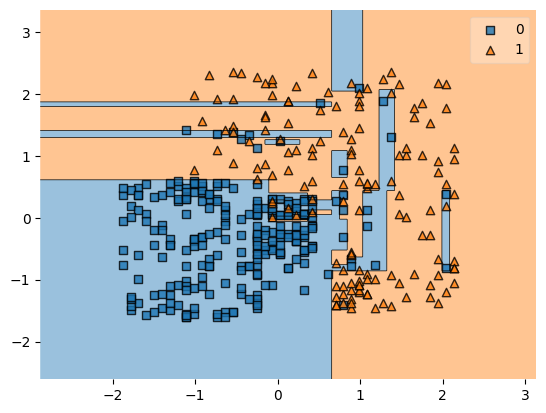

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.values, y.values, clf=dt)
plt.show()